In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from google.colab import files
uploaded = files.upload()

Saving pima.csv to pima.csv


In [ ]:
#funkcja skl.model_selction.train_test_split <- podzial danych 
from sklearn.model_selection import train_test_split 

In [ ]:
np.random.seed(123)
dane_pima_raw = 'pima.csv'
dataframe = pd.read_csv(dane_pima_raw, header = 0)
#podzielenie zbioru danych na zbior walidacyjny testowy i treningowy
dataframe_train, dataframe_test = train_test_split(dataframe, test_size=0.4)
dataframe_validate, dataframe_test = train_test_split(dataframe_test, test_size=0.5)

In [ ]:
dataframe

,times,glucose,blood,skin,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#używamy funckji  VALUES aby zamienic df na macierz następnie wybieramy interesujący nas zakre
data_train = dataframe_train.values
X_train, y_train = data_train[:,:-1], data_train[:,-1]
data_valid = dataframe_validate.values
X_valid, y_valid = data_valid[:,:-1], data_valid[:,-1]
data_test = dataframe_test.values
X_test, y_test = data_test[:,:-1], data_test[:,-1]


In [ ]:
#za pomocą funkcji LabelEncoder dodajemy eytkiety liczbowe do wektora 
y_test = LabelEncoder().fit_transform(y_test.astype('str'))
X_test = X_test.astype('float32')
y_train = LabelEncoder().fit_transform(y_train)
y_valid = LabelEncoder().fit_transform(y_valid)

In [ ]:
# dopasowanie drzewa na zbiorze treningowym 
dtc = tree.DecisionTreeClassifier(random_state=123)
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.00195652, 0.002     , 0.0020595 , 0.00208333,
       0.00212665, 0.00212716, 0.00217391, 0.0026087 , 0.002657  ,
       0.00271732, 0.00282609, 0.00289855, 0.00289855, 0.00289855,
       0.00320158, 0.00326087, 0.00326087, 0.00333696, 0.00347826,
       0.00351662, 0.00362319, 0.00362319, 0.00362319, 0.0036859 ,
       0.00392576, 0.00395257, 0.00395257, 0.00460526, 0.00530401,
       0.00566775, 0.00599295, 0.00603865, 0.00608088, 0.00650094,
       0.0067447 , 0.00678502, 0.00727684, 0.00847881, 0.01119355,
       0.01304723, 0.01743552, 0.01774748, 0.02238231, 0.07414084])

In [ ]:

names = np.array(dataframe.columns)


In [ ]:
y_test_val = np.unique(y_test)
y_test_val = LabelEncoder().fit_transform(y_test_val)
y_test_val

array([0, 1])

In [ ]:
plt.figure(figsize = (20,18))
tree.plot_tree(dtc)

plt.show()

In [ ]:
#tworzenie grafu "czytelniejszego"
import graphviz
#sklearn.tree.export_graphviz - Export a decision tree in DOT format.
dot_data = tree.export_graphviz(dtc,#clf = decision tree classifier 
                                out_file=None, 
                                feature_names=names[ :-1],  
                                class_names=y_test_val,
                                filled=True,
                                rounded = True
                                )
                                
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

TypeError: ignored

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 123)
path = clf.cost_complexity_pruning_path(X_train, y_train)
print(path)
ccp_alphas = path.ccp_alphas
#ccp_alphas

{'ccp_alphas': array([0.        , 0.00195652, 0.002     , 0.0020595 , 0.00208333,
       0.00212665, 0.00212716, 0.00217391, 0.0026087 , 0.002657  ,
       0.00271732, 0.00282609, 0.00289855, 0.00289855, 0.00289855,
       0.00320158, 0.00326087, 0.00326087, 0.00333696, 0.00347826,
       0.00351662, 0.00362319, 0.00362319, 0.00362319, 0.0036859 ,
       0.00392576, 0.00395257, 0.00395257, 0.00460526, 0.00530401,
       0.00566775, 0.00599295, 0.00603865, 0.00608088, 0.00650094,
       0.0067447 , 0.00678502, 0.00727684, 0.00847881, 0.01119355,
       0.01304723, 0.01743552, 0.01774748, 0.02238231, 0.07414084]), 'impurities': array([0.        , 0.00391304, 0.01191304, 0.01603204, 0.0201987 ,
       0.02445201, 0.03296066, 0.03513457, 0.04035196, 0.04832298,
       0.06190956, 0.06756173, 0.07046029, 0.07335884, 0.07915594,
       0.08235752, 0.08887926, 0.09214013, 0.09881404, 0.1022923 ,
       0.10932555, 0.11294874, 0.11657193, 0.1238183 , 0.1311901 ,
       0.13511586, 0.13906843, 

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=names[:-1], class_names = y_vals, filled = True, rounded=True)
graph = graphviz.Source(dot_data, format = 'png')
graph

In [ ]:
#Dla każdego z uzyskanych poddrzew oblicz dokładność na zbiorze walidacyjnym. Stwórz
#wykres zależności parametru α od policzonych dokładność

<function matplotlib.pyplot.show(*args, **kw)>

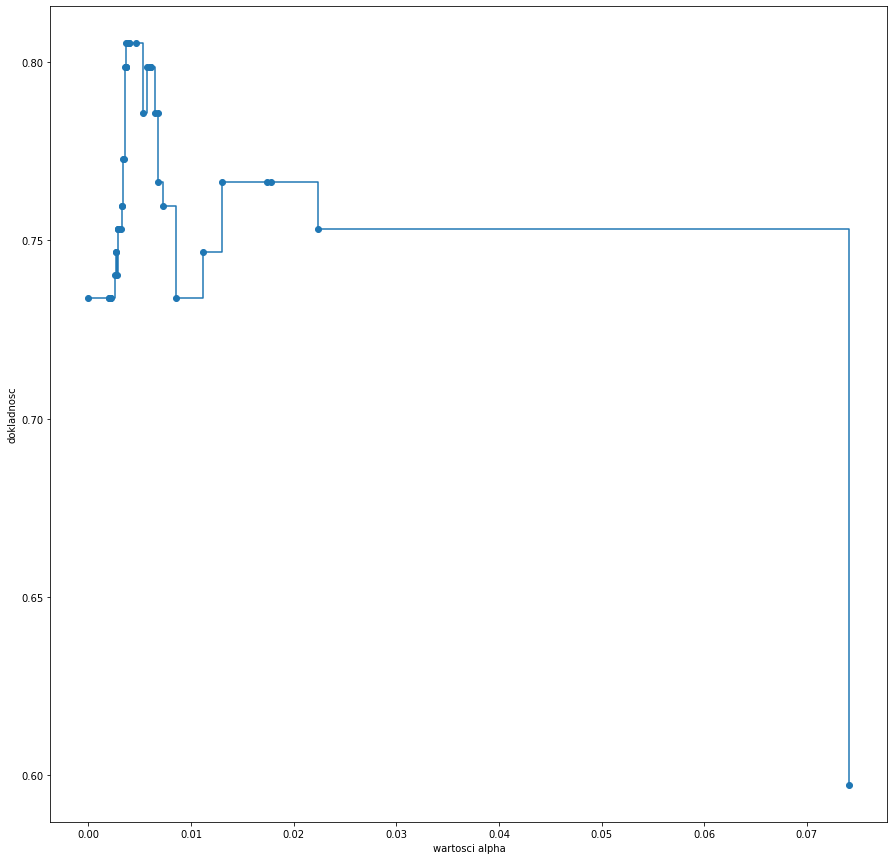

In [ ]:
dok_na_val = []
for i in ccp_alphas:
  clf_val = tree.DecisionTreeClassifier(random_state = 123, ccp_alpha=i)
  clf_val = clf_val.fit(X_train, y_train)
  dok_na_val.append(clf_val.score(X_valid,y_valid))
dok_na_val
plt.figure(figsize=(15,15))
plt.plot(ccp_alphas, dok_na_val, marker = 'o', drawstyle = 'steps-post')
plt.xlabel('wartosci alpha')
plt.ylabel('dokladnosc')
plt.show

In [ ]:
np.array(dok_na_val)

array([0.73376623, 0.73376623, 0.73376623, 0.73376623, 0.73376623,
       0.73376623, 0.73376623, 0.73376623, 0.74025974, 0.74675325,
       0.74675325, 0.74025974, 0.75324675, 0.75324675, 0.75324675,
       0.75324675, 0.75974026, 0.75974026, 0.77272727, 0.77272727,
       0.7987013 , 0.7987013 , 0.7987013 , 0.7987013 , 0.80519481,
       0.80519481, 0.80519481, 0.80519481, 0.80519481, 0.78571429,
       0.7987013 , 0.7987013 , 0.7987013 , 0.7987013 , 0.78571429,
       0.78571429, 0.76623377, 0.75974026, 0.73376623, 0.74675325,
       0.76623377, 0.76623377, 0.76623377, 0.75324675, 0.5974026 ])

In [ ]:
#d Dokonaj wyboru optymalnego poddrzewa wybierając α o największej dokładności. 
#Dopasuj je na połączonych zbiorach treningowym i walidacyjnym
optymalne_alfa = max(ccp_alphas[dok_na_val == max(dok_na_val)]) #max alfa z tych dla ktorych dokladnosc max
X = np.concatenate((X_train, X_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)
clf = tree.DecisionTreeClassifier(random_state=123, ccp_alpha= optymalne_alfa) #model z optymalną lambdą
clf = clf.fit(X, y)

In [ ]:
# maksymalna dokladnosc dok_na_val == max(dok_na_val)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [ ]:
#e
pred_test = clf.predict(X_test) #można liczyć predykcję na zb. testowym, ale mamy score
acc = clf.score(X_test,y_test) #dokładność na zbiorze testowym
print(acc)

0.7467532467532467


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

# Zadanie 2.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

##a

In [ ]:
#wczytanie ramki danych 
df1 = pd.read_csv('pima.csv')

In [ ]:
#podział 
df_train, df_test = train_test_split(df1, test_size=0.4)
df_test, df_val = train_test_split(df_test, test_size =0.5)

##b

In [ ]:
#przy decission tree konieczny podział na X i y
df_test = df_test.values
df_train = df_train.values
df_val = df_val.values
X_test, y_test = df_test[:,:-1], df_test[:,-1]
X_train, y_train = df_train[:,:-1], df_train[:,-1]
X_val, y_val = df_val[:,:-1], df_val[:,-1]

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=123)
model = clf.fit(X_train, y_train)
path = clf.cost_complexity_pruning_path(X_train, y_train)
alfa = path.ccp_alphas
alfa

array([0.        , 0.00413043, 0.00775362, 0.01170619, 0.0156917 ,
       0.01970508, 0.02379715, 0.02797106, 0.03215786, 0.04068788,
       0.0529616 , 0.05586015, 0.06499058, 0.06825145, 0.07151232,
       0.07513551, 0.0787587 , 0.08600507, 0.08962826, 0.10064296,
       0.10436967, 0.10809637, 0.11183343, 0.12708376, 0.1309485 ,
       0.1350928 , 0.1530838 , 0.15774219, 0.17202969, 0.19212191,
       0.20719438, 0.21275155, 0.21832296, 0.22415843, 0.23709211,
       0.25855539, 0.26583644, 0.27353632, 0.28181826, 0.29036644,
       0.30024011, 0.31025981, 0.32224272, 0.33462468, 0.35707216,
       0.38018844, 0.47344991])

##c

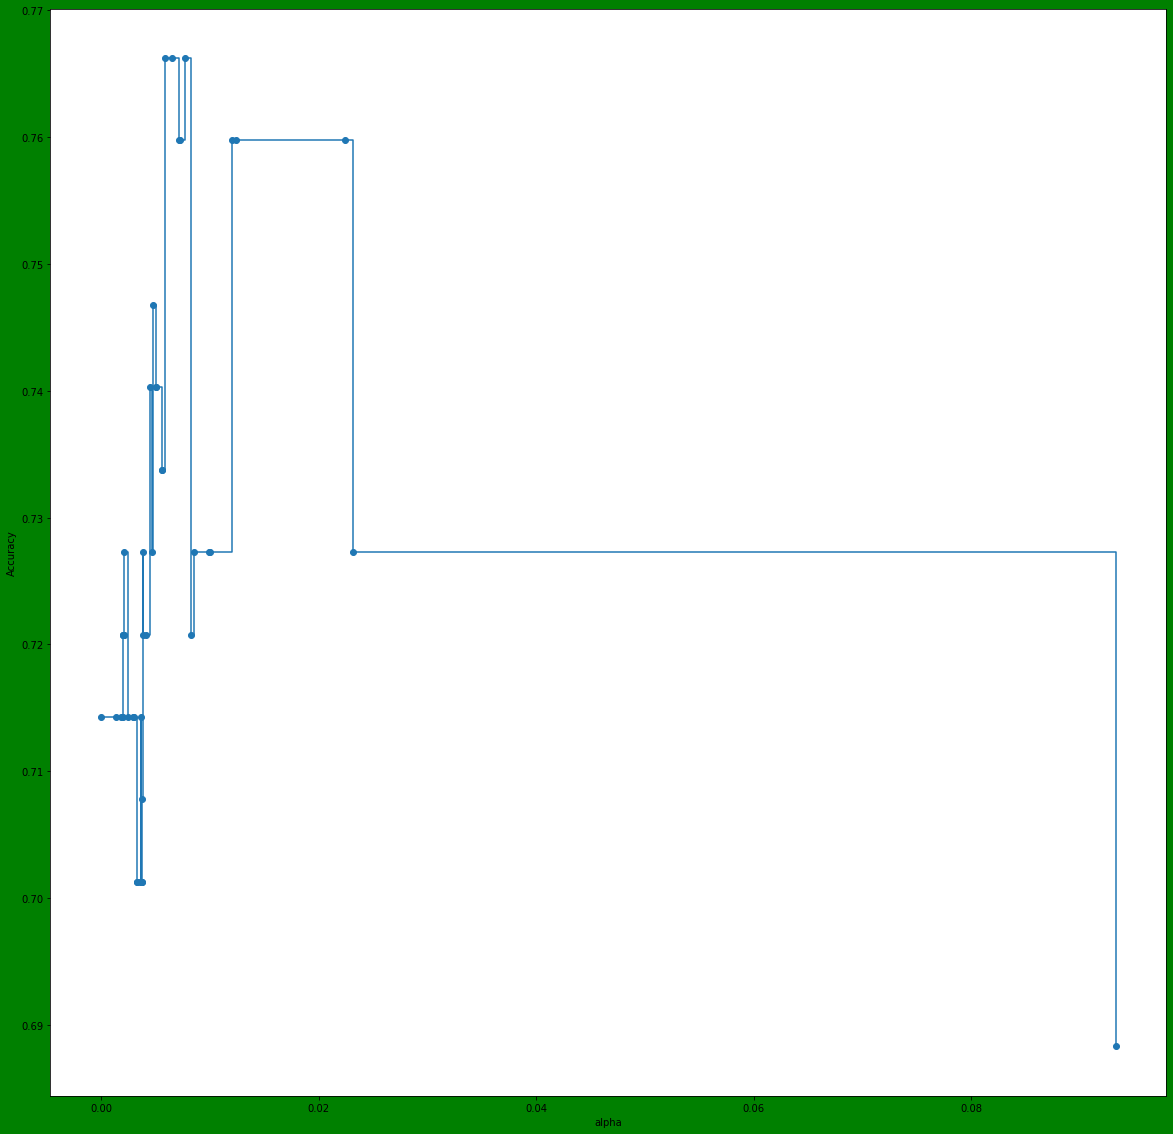

In [ ]:
accuracy= []
for i in alfa:
  clf = tree.DecisionTreeClassifier(random_state=123, ccp_alpha=i) #model z różnymi alfami 
  clf = clf.fit(X_train,y_train) #dopasowywujemy model do danych (szkolimy go)
  accuracy.append(clf.score(X_val, y_val)) # DecisionTreeClassifier.score - zwraca średnią dokładność moedlu
accuracy = np.array(accuracy) #do rysowania wykresu potrzebujemy macierzy numpyowej a nie listy!

plt.figure(figsize = (20,20), facecolor='g')
plt.plot(alfa, accuracy, marker = 'o', drawstyle = 'steps-post') 
plt.xlabel("alpha")
plt.ylabel("Accuracy")

plt.show()

##d

In [ ]:
#musimy wybrać takie alfa, aby model był najdokładniejszy 
accuracy == np.max(accuracy) #liczy nam, na którym miejscu listy jest najdokłądniejszy wynik moedlu 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False])

In [ ]:
alfa[accuracy == np.max(accuracy)]

array([0.00583546, 0.00646684, 0.00769988])

In [ ]:
#ponieważ mamy 3 alfy optymalne to wybierzmy wartość alfa maxymalna 
alfa_opt = max(alfa[accuracy == np.max(accuracy)])

In [ ]:
#połaczenie - numpy ma moduł concatenate
X = np.concatenate((X_train, X_val), axis=0) #axis 0 dodaje nam kolejny wiersz, 1 dodaje kolumne, none - splaszcza macierz don postaci 1xn
y = np.concatenate((y_train, y_val), axis = 0)
tree_opt = tree.DecisionTreeClassifier(random_state=123, ccp_alpha = alfa_opt)  #model z optymalną lambdą
tree_opt_dopasowane = tree_opt.fit(X,y) #dopasowujemy go na połączonym zbiorze treningowym i walidacyjnym

##e

In [ ]:
prediction = tree_opt.predict(X_test) #predykcja na zbiorze testowym)
prediction #jak wrocic do etykiet wejsciowych?

array([0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0.])

In [ ]:
accuracy = tree_opt_dopasowane.score(X_test, y_test)
accuracy

0.7272727272727273

# Zadanie 2.2

In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv


In [ ]:
df2 = pd.read_csv('breast-cancer-wisconsin.csv')
for col in df2:
    print(df2[col].unique())

[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[2 4]


In [ ]:
df2 = pd.read_csv('breast-cancer-wisconsin.csv', na_values ='?') # w naszym zbiorze danych wystepuja ? oznaczamy je jako na
df2.isnull().values.any()

True

In [ ]:
np.unique(df2)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

##a

In [ ]:
from sklearn.model_selection import train_test_split
df2_train, df2_test = train_test_split(df2, test_size =0.3)
df2_train = df2_train.values
df2_test = df2_test.values
X_test, y_test = df2_test[:,:-1], df2_test[:,-1]
X_train, y_train = df2_train[:,:-1], df2_train[:,-1]


In [ ]:
#poniewaz w naszej ramce wystepuja braki danych musimy je czyms zastaoic do tego sluzy funkcja SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer_dopasowany = imputer.fit(X_train) #liczymy średnia na kolumnach zbioru treningowego
X_train =imputer_dopasowany.transform(X_train) #wypelniamy srednimi braki danych na zbiorze treningowym
X_test = imputer_dopasowany.transform(X_test) # w zbiorze testowym braki danych także wypełniamy srednimi pochodzacymi z dopasowania na modelu treningowym

##b

In [ ]:
from sklearn.model_selection import cross_val_score
podzial = np.arange(2,15)
accuracy2 = []
for i in podzial:
  dtc = tree.DecisionTreeClassifier(min_samples_split = i, random_state = 123) # mówi o tym ile musi być co najmniej obserwacji w węźle aby dokonać podziału
  scores = cross_val_score(dtc, X_train, y_train, cv = 5, scoring = 'accuracy')
  print(scores)
  accuracy2.append(np.mean(scores))
print(accuracy2)

[0.92857143 0.94897959 0.91836735 0.8877551  0.93814433]
[0.92857143 0.94897959 0.92857143 0.8877551  0.93814433]
[0.92857143 0.93877551 0.90816327 0.90816327 0.93814433]
[0.94897959 0.94897959 0.90816327 0.90816327 0.92783505]
[0.93877551 0.94897959 0.92857143 0.90816327 0.92783505]
[0.94897959 0.94897959 0.90816327 0.90816327 0.92783505]
[0.94897959 0.93877551 0.90816327 0.90816327 0.92783505]
[0.94897959 0.93877551 0.92857143 0.90816327 0.92783505]
[0.94897959 0.93877551 0.92857143 0.90816327 0.92783505]
[0.94897959 0.93877551 0.92857143 0.90816327 0.94845361]
[0.94897959 0.93877551 0.92857143 0.90816327 0.94845361]
[0.92857143 0.93877551 0.93877551 0.90816327 0.94845361]
[0.92857143 0.93877551 0.93877551 0.90816327 0.94845361]
[0.9243635598569325, 0.9264043761834632, 0.9243635598569325, 0.9284241531664212, 0.9304649694929518, 0.9284241531664212, 0.9263833368398906, 0.9304649694929518, 0.9304649694929518, 0.9345886808331579, 0.9345886808331579, 0.9325478645066274, 0.9325478645066274

In [ ]:
podzial = max(podzial[np.where(accuracy2 == max(accuracy2))]) #arg min_sample_split dla drzewa o srednio najwiekszej dokładności

12

##c

In [ ]:
dtc2 = tree.DecisionTreeClassifier(min_samples_split=12, random_state=123)
dtc2_dopasowany = dtc2.fit(X_train, y_train)
dtc2_score = dtc2_dopasowany.score(X_test, y_test)
print(dtc2_score)
pred_test = dtc2_dopasowany.predict(X_test)
print(pred_test)

0.9380952380952381
[2. 2. 4. 2. 4. 2. 2. 2. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 4. 2. 4. 2. 2. 2.
 2. 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 4. 2. 4. 4. 4. 2. 4. 2. 2. 2. 4. 4. 2.
 4. 2. 2. 2. 2. 4. 2. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 4. 4. 4. 2. 4. 4. 2. 4. 2. 2. 2. 4. 2. 4. 4. 2. 2. 2. 4. 2. 2. 4. 2.
 2. 4. 4. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2. 2. 4. 4. 4. 2. 4. 4. 2. 2. 2.
 2. 4. 2. 2. 2. 4. 4. 2. 2. 2. 4. 2. 2. 2. 4. 4. 2. 2. 2. 2. 4. 4. 2. 2.
 2. 4. 2. 2. 2. 4. 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 4. 2. 2. 4. 4. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 4. 2. 4. 2. 2. 4. 4. 2.
 2. 4. 2. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4.]


In [ ]:
#dla drzewa pelnego 
dtc2 = tree.DecisionTreeClassifier(random_state = 123)
dtc2_dopasowany = dtc2.fit(X_train, y_train)
dtc2_score = dtc2_dopasowany.score(X_test, y_test)
print(dtc2_score)
pred_test = dtc2_dopasowany.predict(X_test)
print(pred_test)

0.9571428571428572
[2. 2. 4. 2. 4. 2. 2. 2. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 4. 2. 4. 2. 2. 2.
 2. 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 4. 2. 2. 4. 4. 2. 4. 2. 2. 2. 4. 4. 4.
 4. 2. 2. 2. 2. 4. 2. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 4. 4. 4. 2. 4. 4. 2. 4. 2. 2. 2. 4. 2. 4. 4. 2. 4. 2. 4. 2. 2. 4. 2.
 2. 4. 4. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2. 2. 4. 4. 4. 4. 4. 4. 2. 2. 2.
 2. 4. 2. 2. 2. 4. 4. 2. 2. 2. 4. 2. 2. 2. 4. 4. 2. 2. 2. 2. 2. 4. 2. 2.
 2. 4. 2. 2. 2. 4. 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 4. 2. 2. 4. 4. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 4. 2. 4. 2. 2. 4. 4. 2.
 2. 4. 2. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 4.]


In [ ]:
#tablica kontyngencji
df = pd.DataFrame({'y_test': y_test,
                   'pred_test': pred_test})
crosstab = pd.crosstab(index=df['pred_test'], columns=df['y_test'])
print(crosstab) 

y_test     2.0  4.0
pred_test          
2.0        137    5
4.0          4   64


#Zadanie 2.3

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [ ]:
df3 = pd.read_csv("bank-full-encoded.csv")
df3.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
5,17,4,1,2,0,1147,1,0,2,4,8,139,0,0,0,3,0
6,10,4,2,2,0,1363,1,1,2,4,8,217,0,0,0,3,0
7,24,2,0,2,1,918,1,0,2,4,8,380,0,0,0,3,0
8,40,5,1,0,0,1037,1,0,2,4,8,50,0,0,0,3,0
9,25,9,2,1,0,1509,1,0,2,4,8,55,0,0,0,3,0


## a

In [ ]:
sum(df3.values[:,-1] == 1)

5289

## b

In [ ]:
dtc3 = tree.DecisionTreeClassifier(random_state= 123)
X, y = df3.values[:,:-1], df3.values[:,-1]
dtc3_fitted = dtc3.fit(X, y)

In [ ]:
from numpy.random.mtrand import shuffle
cross_val_score(dtc3, X, y, cv= 20, scoring = 'accuracy')
np.mean(cross_val_score(dtc3, X, y, cv= 20, scoring = 'accuracy'))

0.7171800010176405

In [ ]:
a = StratifiedKFold(n_splits = 20).split(X,y)
i =1
scores = []

In [ ]:
for train_fold_index, val_fold_index in a: #idziemy pętlą kroswalidacyjną
    print(i, train_fold_index)
    i+=1
    X_train_fold, y_train_fold = X[train_fold_index,:], y[train_fold_index] #dane treningowe
    # Get the validation data
    X_val_fold, y_val_fold = X[val_fold_index,:], y[val_fold_index] #dane walidacyjne

    # dopasowujemy obydwa drzewa na zb. treningowym w danym obrocie pętli kroswalidacyjnej
    dtc3.fit(X_train_fold, y_train_fold)
    score = dtc3.score(X_val_fold,y_val_fold)
    scores.append(score)
print(np.mean(scores))

1 [ 2043  2044  2045 ... 45208 45209 45210]
2 [    0     1     2 ... 45208 45209 45210]
3 [    0     1     2 ... 45208 45209 45210]
4 [    0     1     2 ... 45208 45209 45210]
5 [    0     1     2 ... 45208 45209 45210]
6 [    0     1     2 ... 45208 45209 45210]
7 [    0     1     2 ... 45208 45209 45210]
8 [    0     1     2 ... 45208 45209 45210]
9 [    0     1     2 ... 45208 45209 45210]
10 [    0     1     2 ... 45208 45209 45210]
11 [    0     1     2 ... 45208 45209 45210]
12 [    0     1     2 ... 45208 45209 45210]
13 [    0     1     2 ... 45208 45209 45210]
14 [    0     1     2 ... 45208 45209 45210]
15 [    0     1     2 ... 45208 45209 45210]
16 [    0     1     2 ... 45208 45209 45210]
17 [    0     1     2 ... 45208 45209 45210]
18 [    0     1     2 ... 45208 45209 45210]
19 [    0     1     2 ... 45208 45209 45210]
20 [    0     1     2 ... 44629 44630 44631]
0.7171800010176405


In [ ]:
from sklearn.model_selection import KFold #inna funkcja do kroswalidacji

In [ ]:
X.shape

(45211, 16)

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
dtc3

DecisionTreeClassifier(random_state=123)

In [ ]:
y.describe()

AttributeError: ignored